<a href="https://colab.research.google.com/github/Shemonti/Malaria-Dtetection/blob/main/Maleria_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from matplotlib.image import  imread
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import seaborn as sns

In [ ]:
data_dir='/content/drive/MyDrive/cell_images'

In [ ]:
os.listdir(data_dir)

['test', 'train']

In [ ]:
train_path=data_dir+'//train//'
test_path=data_dir+'//test//'

In [ ]:
train_path

'/content/drive/MyDrive/cell_images//train//'

In [ ]:
test_path

'/content/drive/MyDrive/cell_images//test//'

In [ ]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [ ]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [ ]:
os.listdir(train_path+'parasitized')[0]

'C95P56ThinF_IMG_20150821_171603_cell_80.png'

In [ ]:
os.listdir(train_path+'uninfected')[0]

'C81P42ThinF_IMG_20150817_115942_cell_144.png'

In [ ]:
para_cell=train_path+'parasitized//'+'C95P56ThinF_IMG_20150821_171603_cell_80.png'

In [ ]:
para_cell

'/content/drive/MyDrive/cell_images//train//parasitized//C95P56ThinF_IMG_20150821_171603_cell_80.png'

In [ ]:
uninfected_cell=train_path+'uninfected//'+'C81P42ThinF_IMG_20150817_115942_cell_144.png'

In [ ]:
uninfected_cell

'/content/drive/MyDrive/cell_images//train//uninfected//C81P42ThinF_IMG_20150817_115942_cell_144.png'

In [ ]:
imread(uninfected_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
imread(uninfected_cell).shape

(127, 151, 3)

In [ ]:
imread(para_cell).shape

(133, 133, 3)

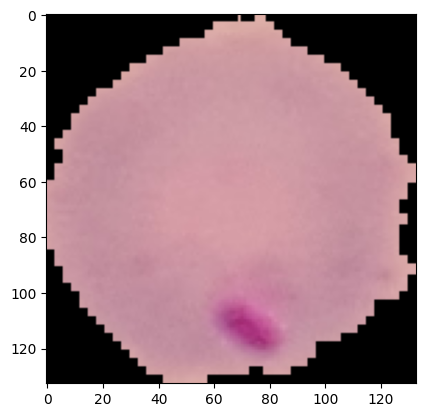

In [ ]:
plt.imshow(imread(para_cell))

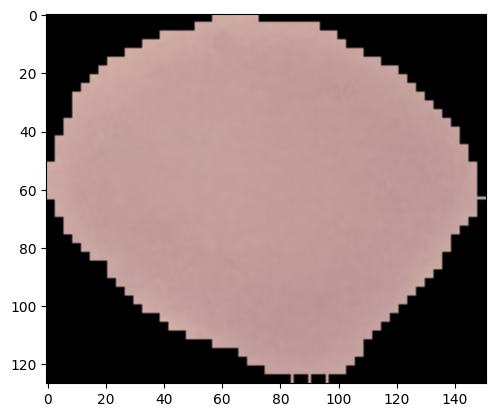

In [ ]:
plt.imshow(imread(uninfected_cell))

In [ ]:
len(os.listdir(train_path+'parasitized'))

12480

In [ ]:
len(os.listdir(train_path+'uninfected'))

12490

In [ ]:
len(os.listdir(test_path+'uninfected'))

1300

In [ ]:
len(os.listdir(test_path+'parasitized'))

1300

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),

    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
para_img=imread(para_cell)

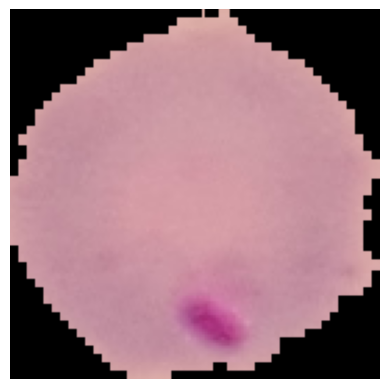

In [ ]:
plt.axis('off')
plt.imshow(para_img)


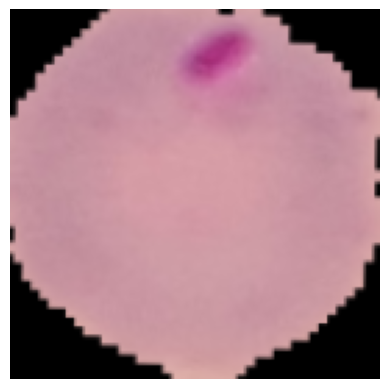

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(para_img))


In [ ]:
data_augmentation(para_img)

<tf.Tensor: shape=(133, 133, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [ ]:
dim1=[]
dim2=[]

for img_filename in os.listdir(test_path+'uninfected'):
  img=imread(test_path+'uninfected//'+img_filename)
  d1,d2,colors=img.shape
  dim1.append(d1)
  dim2.append(d2)


In [ ]:
img_shape=(130,130,3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_gen=ImageDataGenerator(


    zca_whitening=False, zca_epsilon=1e-06, rotation_range=20, width_shift_range=0.1,
    height_shift_range=0.1, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.1, fill_mode='nearest', cval=0.1,
    horizontal_flip=True, vertical_flip=True,

)

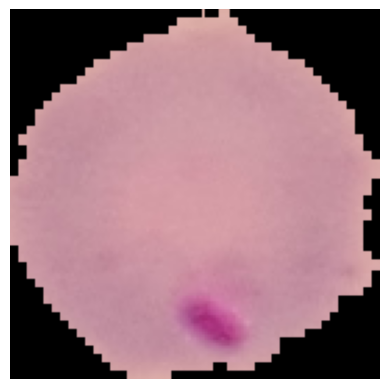

In [ ]:
plt.axis('off')
plt.imshow(para_img)

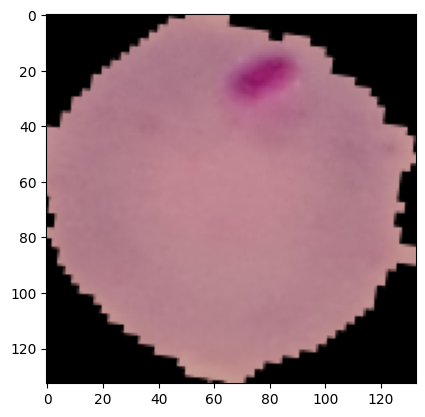

In [ ]:
plt.imshow(img_gen.random_transform(para_img))

In [ ]:
img_gen.flow_from_directory(train_path)

Found 24968 images belonging to 2 classes.


In [ ]:
img_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [ ]:


model = Sequential([

  layers.Conv2D(32, 3, padding='same',input_shape = (img_shape), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same',input_shape = (img_shape), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same',input_shape = (img_shape), activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1,activation='sigmoid')
])

model.compile(
      optimizer='adam',
     loss='binary_crossentropy',
     metrics=['accuracy']
 )




In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',  patience=2)

In [ ]:
batch_size=16

In [ ]:
img_shape

(130, 130, 3)

In [ ]:
train_img_gen=img_gen.flow_from_directory(train_path,
                                          target_size=img_shape[:2],
                                          color_mode='rgb',
                                          batch_size=batch_size,
                                          class_mode='binary')

Found 24968 images belonging to 2 classes.


In [ ]:
test_img_gen=img_gen.flow_from_directory(test_path,
                                          target_size=img_shape[:2],
                                          color_mode='rgb',
                                          batch_size=batch_size,
                                          class_mode='binary',
                                          shuffle=False)

Found 2600 images belonging to 2 classes.


In [ ]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
test_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
model.fit_generator(train_img_gen, epochs=30,validation_data=test_img_gen,callbacks=[early_stop])

<ipython-input-54-18e6bb441cc1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_img_gen, epochs=30,validation_data=test_img_gen,callbacks=[early_stop])


Epoch 1/30
1561/1561 [==============================] - 4633s 3s/step - loss: 0.9055 - accuracy: 0.5417 - val_loss: 0.6917 - val_accuracy: 0.5388
Epoch 2/30
1561/1561 [==============================] - 207s 133ms/step - loss: 0.6772 - accuracy: 0.5765 - val_loss: 0.6661 - val_accuracy: 0.6023
Epoch 3/30
1561/1561 [==============================] - 204s 131ms/step - loss: 0.6710 - accuracy: 0.6065 - val_loss: 0.6940 - val_accuracy: 0.5058
Epoch 4/30
1561/1561 [==============================] - 200s 128ms/step - loss: 0.6945 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 130, 130, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 65, 65, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 65, 65, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)       

In [ ]:
model.history.history

{'loss': [0.9055478572845459,
  0.6772052645683289,
  0.6709883809089661,
  0.6944777369499207],
 'accuracy': [0.541693389415741,
  0.5765379667282104,
  0.6064963340759277,
  0.49795737862586975],
 'val_loss': [0.6917238235473633,
  0.6660889387130737,
  0.6940250396728516,
  0.6931509375572205],
 'val_accuracy': [0.5388461351394653,
  0.6023076772689819,
  0.5057692527770996,
  0.5]}

In [ ]:
model.evaluate(test_img_gen)

163/163 [==============================] - 31s 189ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931509375572205, 0.5]